# Experiment on softmax

$$ softmax(z_j) = {e^{z_j} \over {\sum_{i=1}^m e^{z_i} }} , j=1, ... m $$

## 反向传播计算步骤：

* 计算输出层，计算最后一层softmax输出层的下列值：

$$ \delta_i^L = ({a_i^L} - y_i) $$

$$ \frac {\partial C}{\partial w_{ij}^L} = ({a_i^L}-{y_i}){a_j^{L-1}} = \delta_i^L \cdot a_j^{L-1} $$

$$ \frac {\partial C}{\partial b_{i}^L} = ({a_i^L} - y_i) =\delta_i^L $$

* 计算隐藏层，反向一层一层计算sigmoid隐藏层的下列值：

$$ \delta_j^{l-1} = (\sum_{k=1}^m {\delta_k^l \cdot w_{kj}}) \cdot { a_j^{l-1} (1 - a_j^{l-1}) } $$

$$ \frac {\partial C}{\partial w_{ij}^l} = \delta_i^{l} \cdot a_j^{l-1} $$

$$ \frac {\partial C}{\partial b_{i}^l} = \delta_i^{l} $$

In [1]:
import numpy as np

def softmax(z):
    """
    z: is a array of input
    return: softmax correspond to each of the element
    """
    return np.exp(z)/np.sum(np.exp(z), 1, keepdims=True)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost(activations, expectations):
    #return np.sum(expectations*np.log(activations), 1)
    return np.sum(-expectations*np.log(activations))

In [2]:
# prepare the training data

# training input data
input = np.array([[0, 0, 0, 1],
                 [0, 0, 1, 0],
                 [0, 0, 1, 1],
                 [0, 1, 0, 0],
                 [0, 1, 0, 1],
                 [0, 1, 1, 0],
                 [0, 1, 1, 1]])

# training output expectation
output = np.array([[0, 1],
                   [1, 0],
                   [0, 1],
                   [1, 0],
                   [0, 1],
                   [1, 0],
                   [0, 1]])

# 网络拓扑

![拓扑](http://singleye-public-read.oss-cn-shanghai.aliyuncs.com/singleye.net/static/2017/09/softmax/experiment-softmax.jpg)

In [3]:
# construct the network

# input layer: 4 inputs
# hidden layer: 5 neurons with sigmoid as activate function
# * weight: 4x5 matrices
# * bias: 1x5 matrices
# output layer: 2 neurons with softmax as activate function
# * weight: 5x2 matrices
# * bias: 1x2 matrices

# initialize the weight/bias of the hidden layer (2nd layer)
w2 = np.random.rand(4, 5)
b2 = np.random.rand(1, 5)

# initialize the weight/bias of the output layer (3rd layer) 
w3 = np.random.rand(5, 2)
b3 = np.random.rand(1, 2)

In [4]:
num_epochs = 10000
eta = 0.1

x=[]
y=[]

for i in xrange(num_epochs):
    # feed forward
    z2 = np.dot(input, w2) + b2
    #z2 = np.dot(input, w2)
    a2 = sigmoid(z2) # 7x5

    z3 = np.dot(a2, w3) + b3
    #z3 = np.dot(a2, w3)
    a3 = softmax(z3) # 7x2
    
    if i%1000 == 0:
        print "Perception", a3
        print "W2", w2
        print "B2", b2
        print "W3", w3
        print "B3", b3

    x.append(i)
    y.append(cost(a3, output))

    # 7x2
    delta_l3 = a3 - output
    #deriv_w3 = np.dot(delta_l3, w3.T)*a2
    deriv_w3 = np.dot(a2.T, delta_l3)
    deriv_b3 = delta_l3
    w3 -= eta*deriv_w3
    b3 -= eta*np.mean(deriv_b3, 0)
    
    delta_l2 = np.dot(delta_l3, w3.T)*(a2*(1-a2)) # 7x5
    #print "d2", delta_l2
    #print "w2", w2
    # d: 7x5
    # w: 4x5
    deriv_w2 = np.dot(input.T, delta_l2)
    deriv_b2 = delta_l2
    #print deriv_w2
    #print deriv_b2
    w2 -= eta*deriv_w2
    b2 -= eta*np.mean(deriv_b2, 0)

Perception [[ 0.61447444  0.38552556]
 [ 0.63411271  0.36588729]
 [ 0.63291354  0.36708646]
 [ 0.62566476  0.37433524]
 [ 0.62461907  0.37538093]
 [ 0.64090918  0.35909082]
 [ 0.64021094  0.35978906]]
W2 [[ 0.98581723  0.77097799  0.43174681  0.44405765  0.11745462]
 [ 0.56285789  0.68637715  0.11755575  0.40969895  0.10522042]
 [ 0.29521794  0.49557402  0.52698973  0.65697418  0.29259944]
 [ 0.05643833  0.79178668  0.0175052   0.00110209  0.07388702]]
B2 [[ 0.55055101  0.92322898  0.29658861  0.61080862  0.67286559]]
W3 [[ 0.99459228  0.98659168]
 [ 0.85772062  0.91232175]
 [ 0.25425736  0.09411044]
 [ 0.59848548  0.1101079 ]
 [ 0.50518666  0.55335981]]
B3 [[ 0.38276182  0.2520216 ]]
Perception [[  6.25341793e-04   9.99374658e-01]
 [  9.96828319e-01   3.17168117e-03]
 [  1.19162234e-03   9.98808378e-01]
 [  9.96818146e-01   3.18185410e-03]
 [  1.14727780e-03   9.98852722e-01]
 [  9.99647489e-01   3.52510850e-04]
 [  3.72190201e-03   9.96278098e-01]]
W2 [[ 0.98581723  0.77097799  0.431

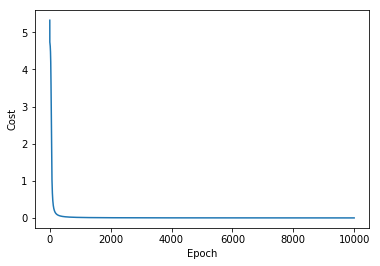

In [5]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()